<a href="https://colab.research.google.com/github/Alvaroguijarro97/ML_Group_Project/blob/main/Dataframes_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combination of different Data Sets

In [1]:
# importing basic modules
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# import file "foreign_data_by_state_sorted.csv"
from google.colab import files
uploaded = files.upload()

Saving foreign_data_by_state_sorted.csv to foreign_data_by_state_sorted.csv


In [3]:
import io
foreign_data_complete = pd.read_csv(io.BytesIO(uploaded['foreign_data_by_state_sorted.csv']), encoding="windows_1258")

foreign_data_complete = foreign_data_complete.drop([0])

foreign_data_complete = foreign_data_complete.rename(
    columns={
        "Foreign_Population": "Foreign_Population.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [4]:
# import file "migrant_background_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving migrant_background_data_by_state_sorted.csv to migrant_background_data_by_state_sorted.csv


In [5]:
import io
migrant_background_data_complete = pd.read_csv(io.BytesIO(uploaded['migrant_background_data_by_state_sorted.csv']), encoding="windows_1258")

migrant_background_data_complete = migrant_background_data_complete.drop([0])

migrant_background_data_complete = migrant_background_data_complete.rename(
    columns={
        "Population with migrant background": "Population with migrant background.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [6]:
# import file "geographical_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving geographical_data_by_state_sorted.csv to geographical_data_by_state_sorted.csv


In [7]:
import io
geography_data_complete = pd.read_csv(io.BytesIO(uploaded['geographical_data_by_state_sorted.csv']), encoding="windows_1258")
geography_data_complete = geography_data_complete.drop([0])

geography_data_complete = geography_data_complete.rename(
    columns={
        "Distance": "Distance.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [8]:
blank_df = pd.DataFrame(
    {
    "Baden-Württemberg": [],
    "Bavaria": [],
    "Berlin": [],
    "Brandenburg": [],
    "Bremen": [],
    "Hamburg": [],
    "Hesse": [],
    "Mecklenburg Western Pomerania": [],
    "Lower Saxony": [],
    "Northrhine-Westphalia": [],
    "Rhineland Palatinate": [],
    "Saarland": [],
    "Sachsen": [],
    "Sachsen-Anhalt": [],
    "Schleswig-Holstein": [],
    "Thuringia": []
    }
)

blank_df = blank_df.T

In [9]:
central_table_renamed_filtered_1 = blank_df.join(migrant_background_data_complete, rsuffix='_migrant')
central_table_renamed_filtered_1 = central_table_renamed_filtered_1.add_suffix('_migrant')

central_table_renamed_filtered_2 = blank_df.join(foreign_data_complete, rsuffix='_foreign')
central_table_renamed_filtered_2 = central_table_renamed_filtered_2.add_suffix('_foreign')

central_table_renamed_filtered_3 = blank_df.join(geography_data_complete, rsuffix='_geography')
central_table_renamed_filtered_3 = central_table_renamed_filtered_3.add_suffix('_geography')

central_table_migrant_background_foreign = central_table_renamed_filtered_1.join(central_table_renamed_filtered_2)

central_table_migrant_background_foreign_geography = central_table_migrant_background_foreign.join(central_table_renamed_filtered_3)

In [10]:
#Upload Data_Abortion_state.csv
from google.colab import files
uploaded = files.upload()

Saving Data_Abortion_state.csv to Data_Abortion_state.csv


In [11]:
import io
df_abortion_state = pd.read_csv(io.BytesIO(uploaded['Data_Abortion_state.csv']) ,encoding="windows_1258")
df_abortion_state = df_abortion_state.rename(index = {
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'},
  columns = {
       "Ausland" : "Foreign"
       }
    )

In [12]:
column_names = list(df_abortion_state.columns)
df_abortion_total = df_abortion_state.convert_dtypes()
df_abortion_total['Germans_total']= df_abortion_state[column_names[:-1]].sum(axis=1)
df_abortion_total = df_abortion_total.rename(index={
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'}
    )
df_abortion_total = df_abortion_total.filter(items = ["Foreign", "Germans_total"])
df_abortion_total = df_abortion_total.fillna(0)

In [13]:
#Add the abortion information of each state into the dataframe
central_table_migrant_background_foreign_geography["abortions_total"] = df_abortion_total["Germans_total"]
central_table_migrant_background_foreign_geography["abortions_foreign"] = df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_local"] = df_abortion_total["Germans_total"] - df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_type"] = ""

#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_aforeign = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_foreign)]
central_table_migrant_background_foreign_geography_aforeign.abortions_type = 1

#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_alocal = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_local)]
central_table_migrant_background_foreign_geography_alocal.abortions_type = 0

info = [central_table_migrant_background_foreign_geography_aforeign,central_table_migrant_background_foreign_geography_alocal]
central_table_migrant_background_foreign_geography_repeated = pd.concat(info)

In [14]:
# possibility to download the generated Data Frame
central_table_migrant_background_foreign_geography_repeated.to_csv('central_table_migrant_background_foreign_geography_repeated.csv') 
from google.colab import files
files.download("central_table_migrant_background_foreign_geography_repeated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Central Table with the NAs replaced by 0 since in our case NA means to small to measure (wihle other populations are represented by small single digit numbers)
No_NA_central_table = central_table_migrant_background_foreign_geography_repeated.fillna(0)

In [ ]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table.to_csv('No_NA_central_table.csv') 
from google.colab import files
files.download("No_NA_central_table.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
No_NA_central_table.columns

Index(['Population with migrant background.0_migrant',
       'Population with migrant background.1_migrant',
       'Population with migrant background.2_migrant',
       'Population with migrant background.3_migrant',
       'Population with migrant background.4_migrant',
       'Population with migrant background.5_migrant',
       'Population with migrant background.6_migrant',
       'Population with migrant background.7_migrant',
       'Population with migrant background.8_migrant',
       'Population with migrant background.9_migrant',
       ...
       'Country_Score.25_geography', 'Country_Score.26_geography',
       'Country_Score.27_geography', 'Country_Score.28_geography',
       'Country_Score.29_geography', 'Country_Score.30_geography',
       'abortions_total', 'abortions_foreign', 'abortions_local',
       'abortions_type'],
      dtype='object', length=229)

# Basic Model Creation

In [17]:
# Delete string variable country code
No_NA_central_table_no_ISO3 = No_NA_central_table[No_NA_central_table.columns.drop(list(No_NA_central_table.filter(regex = "Country\.")))]

# Set X and y values with our own data
X = No_NA_central_table_no_ISO3.drop(["abortions_foreign",	"abortions_local",	"abortions_type", "abortions_total"], axis=1)
y = No_NA_central_table_no_ISO3["abortions_type"]

In [ ]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table_no_ISO3.to_csv('No_NA_central_table_no_ISO3.csv') 
from google.colab import files
files.download("No_NA_central_table_no_ISO3.csv")

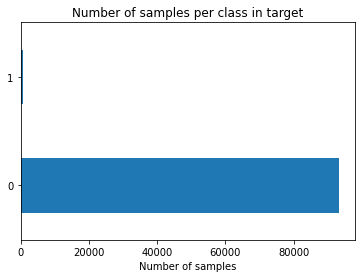

In [18]:
# Plot distribution of y
# y is etremely uneven distributed
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per class in target")

In [19]:
# Set up training and testing data
from sklearn.model_selection import train_test_split
# TBA: set sub parameters (testsize etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.5)

## Dummy Model

In [24]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy Dummy Classifier: "
      f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy Dummy Classifier: 0.994


## Logistic Regression Model (unweighted)

In [33]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression

classifier_no_weights = LogisticRegression(max_iter= 1000)
classifier_no_weights.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Accuracy Metrics

In [ ]:
# LogisticRegression .score for the unweighted model for accuracy metrics
# Accuracy score is extremely high (which is a suspicious) 
unbalanced_accuracy_unweighted = classifier_no_weights.score(X_test, y_test)
print(f" Unbabalnced accuracy: {unbalanced_accuracy_unweighted:.3f}")

 Unbabalnced accuracy: 0.994


In [ ]:
# Using 'balanced accuracy' metric (for binary and multiclass classification problems with imbalanced datasets)
# Definition: Average of recall obtained on each class
# Unweighted balanced accuracy is 50/50 (which is a poor score) 
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_no_weights.predict(X_test)

balanced_accuracy_unweighted = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy_unweighted:.3f}")

Balanced accuracy: 0.500


### Confusion Matrix

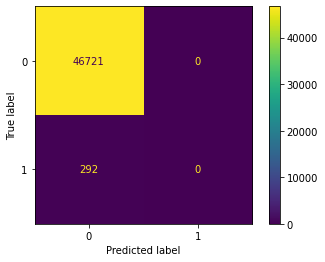

In [49]:
# Due to the extreme inbalance, an unweighted model predicts 0 foreign pregnancies
# An unweighted model therefore scores extremely high on unbalanced accuracy and extremely poor on balanced accuracy
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_no_weights, X_test, y_test)

## Logistic Regression Model (weighted)

In [26]:
# Optimized class weights based on the distribution of the y variables
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights

array([ 0.50297422, 84.5557554 ])

In [25]:
# Implement provided ideal weights into Logistic Regression Model
classifier_class_weights = LogisticRegression(max_iter= 1500, class_weight={0:class_weights[0],1:class_weights[1]})
classifier_class_weights.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.502974216326094, 1: 84.55575539568345},
                   max_iter=1500)

### Accuracy Metrics

In [ ]:
# LogisticRegression .score for the unweighted model for accuracy metrics
# score is still high but not necessarily problematic (lower than unweighted)
unbalanced_accuracy_weighted = classifier_class_weights.score(X_test, y_test)
print(f" Unbabalanced accuracy: {unbalanced_accuracy_weighted:.3f}")

 Unbabalanced accuracy: 0.861


In [ ]:
# Using 'balanced accuracy' metric (for binary and multiclass classification problems with imbalanced datasets)
# Definition: Average of recall obtained on each class
# Unweighted balanced accuracy is high and much better than the performance of the unweighted model 
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_class_weights.predict(X_test)

balanced_accuracy_weighted = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy_weighted:.3f}")

Balanced accuracy: 0.845


### Confusion Matrix

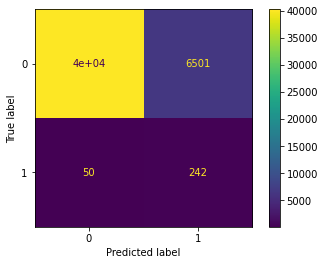

In [ ]:
# Confusion Matrix shows much improved numbers
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_class_weights, X_test, y_test)

## Metrics

### Precision-Recall Curves



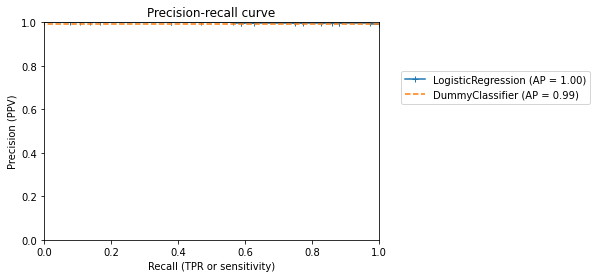

In [ ]:
# Precision-Recall Curve
# reflects the high basic score of the dummy model (due to very inbalanced classes), however our weighted model still performs better
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.xlabel("Recall (TPR or sensitivity)")
plt.ylabel("Precision (PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

###Receiver Operating Characteristic (ROC) Curve

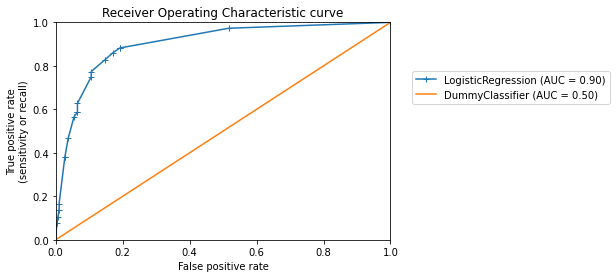

In [26]:
# Receiver Operating Characteristic (ROC) Curve
# probability threshold varies for determining prediction and compute the metrics
# Area under the ROC (ROC-AUC) to characterize the generalization performance of our classifier (similar to precision-recall curve above)
# lower bound of the ROC-AUC is 0.5 (generalization performance of dummy classifier)
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", ax=disp.ax_)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")



# Further Modeling 

## Random Forest

### Random Forest Classifier (unweighted)

In [23]:
# Decision trees often perform better on imbalanced datasets.
# their hierarchical structure allows them to learn signals from both classes.
# One Option here would be using a Random Forest model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
 
# Train model
classifier_forest = RandomForestClassifier(random_state=123)
classifier_forest.fit(X_train, y_train)
 
# Predict on training set
pred_y_forest = classifier_forest.predict(X_test)
 
# Is our model predicting both classes?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_forest)}")
# this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class
 
# How's our accuracy?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_forest):.4f}")
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_forest = classifier_forest.predict_proba(X_test)
prob_y_forest = [p[1] for p in prob_y_forest]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, prob_y_forest):.4f}")

Classes that are being predicted: [0]
Accuracy Score: 0.9938
Area Under ROC Curve (AUROC): 0.9022


In [24]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     46721
           1       0.00      0.00      0.00       292

    accuracy                           0.99     47013
   macro avg       0.50      0.50      0.50     47013
weighted avg       0.99      0.99      0.99     47013



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


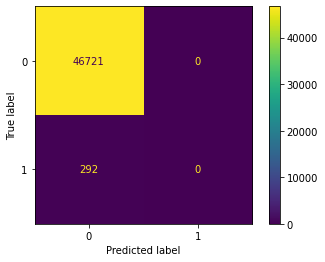

In [26]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_forest, X_test, y_test)

### Random Forest Classifier (weighted)

In [27]:
# Train model with balanced class weight
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
classifier_weighted_forest = RandomForestClassifier(random_state=123, class_weight='balanced')
classifier_weighted_forest.fit(X_train, y_train)
 
# Predict on training set
pred_y_weighted_forest = classifier_weighted_forest.predict(X_test)
 
# Is our model still predicting just one class?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_weighted_forest)}")
 
# How's our accuracy when a weight is added?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_weighted_forest):.4f}")
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_weighted_forest = classifier_weighted_forest.predict_proba(X_test)
prob_y_weighted_forest = [p[1] for p in prob_y_weighted_forest]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, pred_y_weighted_forest):.4f}")

Classes that are being predicted: [0 1]
Accuracy Score: 0.8607
Area Under ROC Curve (AUROC): 0.8448


In [28]:
# View the classification report for test data and predictions

print(classification_report(y_test, pred_y_weighted_forest))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     46721
           1       0.04      0.83      0.07       292

    accuracy                           0.86     47013
   macro avg       0.52      0.84      0.50     47013
weighted avg       0.99      0.86      0.92     47013



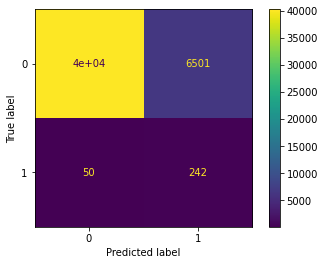

In [29]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_weighted_forest, X_test, y_test)

### Random Forest with Random Undersampling

In [69]:
# A balanced random forest randomly under-samples each boostrap sample to balance it.
from imblearn.ensemble import BalancedRandomForestClassifier

# Train model 
classifier_balanced_forest = BalancedRandomForestClassifier(random_state=123)
classifier_balanced_forest.fit(X_train, y_train)
 
# Predict on training set
pred_y_balanced_forest = classifier_balanced_forest.predict(X_test)
 
# Is our model still predicting just one class?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_balanced_forest)}")
 
# How's our accuracy when a weight is added?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_balanced_forest):.4f}")

# and balanced accuracy?
balanced_accuracy_weighted = balanced_accuracy_score(y_test, pred_y_forest)
print(f"Balanced accuracy: "
      f"{balanced_accuracy_weighted:.4f}")
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_balanced_forest = classifier_balanced_forest.predict_proba(X_test)
prob_y_balanced_forest = [p[1] for p in prob_y_balanced_forest]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, prob_y_balanced_forest):.4f}")

Classes that are being predicted: [0 1]
Accuracy Score: 0.8607
Balanced accuracy: 0.5000
Area Under ROC Curve (AUROC): 0.9038


In [34]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_balanced_forest))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     46721
           1       0.04      0.83      0.07       292

    accuracy                           0.86     47013
   macro avg       0.52      0.84      0.50     47013
weighted avg       0.99      0.86      0.92     47013



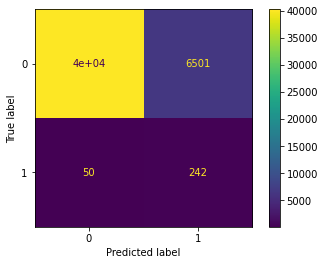

In [36]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_balanced_forest, X_test, y_test)

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

sel = SelectFromModel(classifier_balanced_forest)
sel.fit(X_train, y_train)

sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)

Index(['Country_Score.6_foreign', 'Country_Score.7_foreign',
       'Country_Score.18_foreign', 'Distance.0_geography',
       'Distance.12_geography', 'Distance.14_geography',
       'Distance.15_geography', 'Distance.16_geography',
       'Distance.17_geography', 'Distance.18_geography',
       'Distance.19_geography', 'Distance.20_geography',
       'Distance.21_geography', 'Distance.24_geography',
       'Distance.26_geography', 'Distance.29_geography',
       'Distance.30_geography', 'Country_Score.1_geography',
       'Country_Score.2_geography', 'Country_Score.11_geography',
       'Country_Score.15_geography', 'Country_Score.16_geography',
       'Country_Score.20_geography', 'Country_Score.21_geography',
       'Country_Score.26_geography', 'Country_Score.27_geography'],
      dtype='object')


Feature: 0, Score: 106.00000
Feature: 1, Score: 121.00000
Feature: 2, Score: 139.00000
Feature: 3, Score: 117.00000
Feature: 4, Score: 108.00000
Feature: 5, Score: 63.00000
Feature: 6, Score: 120.00000
Feature: 7, Score: 112.00000
Feature: 8, Score: 146.00000
Feature: 9, Score: 109.00000


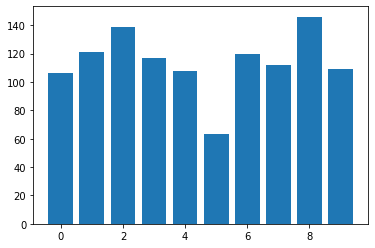

None


In [61]:
# Random Forest Classification Feature Importance
from matplotlib import pyplot

# get importance
importance = classifier_balanced_forest.feature_importances_
sorted_importance = np.argsort(importance)
most_important = sorted_importance[-10 : ]

# summarize feature importance
for i,v in enumerate(most_important):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(most_important))], most_important)
print(pyplot.show())

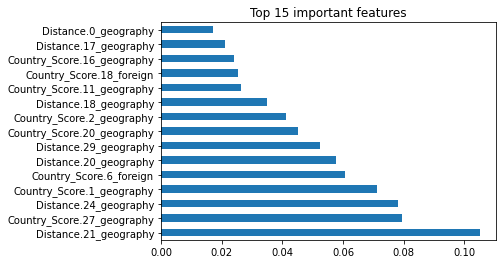

In [63]:
feat_importances = pd.Series(classifier_balanced_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

## Support Vector Machine Model

In [71]:
# SVM for imbalanced classification
from sklearn.svm import SVC

# Train model 
classifier_balanced_svm = SVC(gamma='scale', class_weight='balanced')
classifier_balanced_svm.fit(X_train, y_train)

# Predict on training set
pred_y_balanced_svm = classifier_balanced_svm.predict(X_test)

In [ ]:
# SVM Model evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# Is our model still predicting just one class?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_balanced_svm)}")
 
# How's our accuracy when a weight is added?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_balanced_svm):.4f}")
 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(classifier_balanced_svm, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Classes that are being predicted: [0 1]
Accuracy Score: 0.8818


In [29]:
# View the classification report for test data and predictions

print(classification_report(y_test, pred_y_balanced_svm))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     46721
           1       0.04      0.81      0.08       292

    accuracy                           0.88     47013
   macro avg       0.52      0.85      0.51     47013
weighted avg       0.99      0.88      0.93     47013



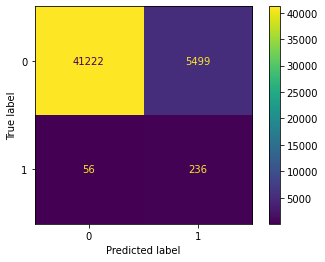

In [31]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay.from_estimator(classifier_balanced_svm, X_test, y_test)

In [70]:
feat_importances = pd.Series(classifier_balanced_svm.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

NameError: ignored